In [2]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/Aneg0707/IBM-Watson-Marketing-Customer-Value-Data/main/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

# Data Overview & Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [7]:
def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

In [8]:
data.shape

(9134, 24)

In [9]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


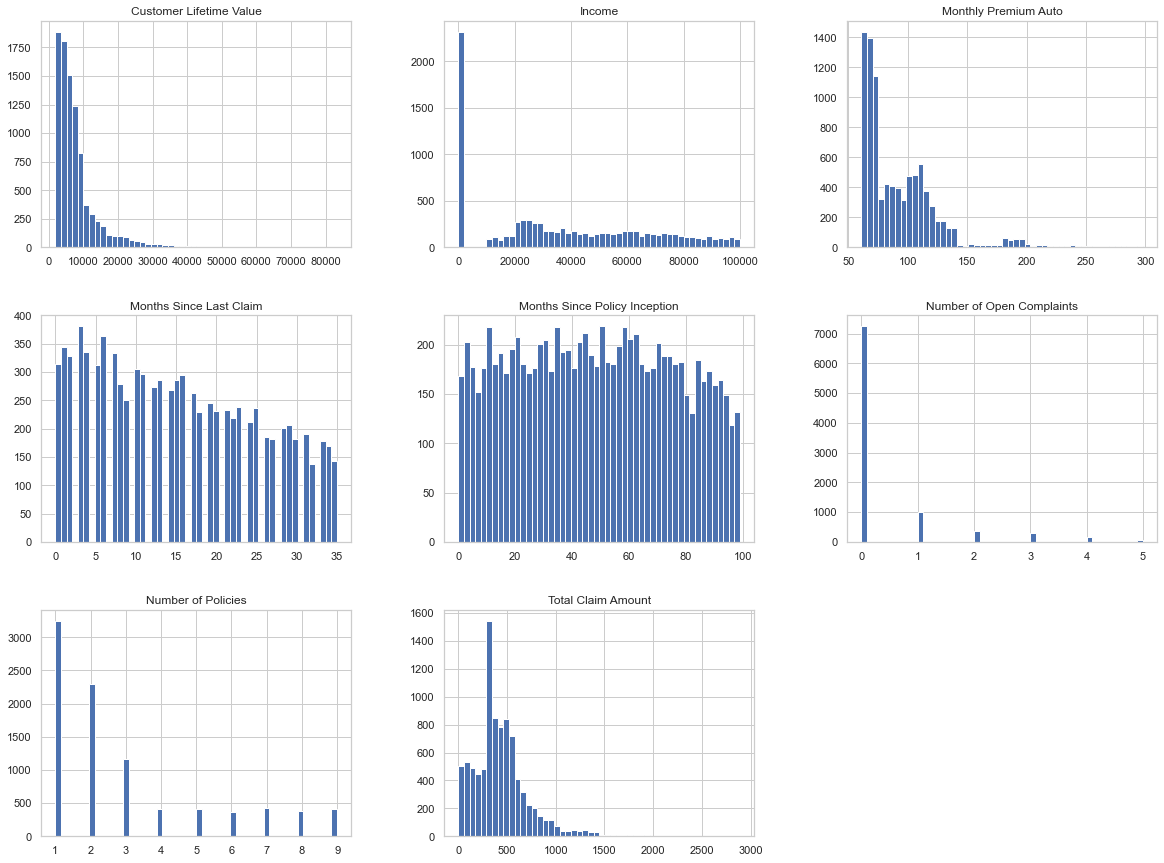

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
data.drop(labels='Effective To Date', axis=1,inplace=True)

In [12]:
g=data.columns.to_series().groupby(data.dtypes).groups
ColumnType ={k.name: v for k, v in g.items()} 
   
print("Done")

Done


In [13]:
data["LTV category"] = pd.cut(data["Customer Lifetime Value"], bins=[0, 5000, 10000, 20000, float("inf")], labels=['A', 'B', 'C','D'])

In [15]:
y=data["LTV category"].replace(to_replace=['A', 'B', 'C','D'], value=[0,1,2,3])
y[0:10]

0    0
1    1
2    2
3    1
4    0
5    1
6    1
7    1
8    3
9    1
Name: LTV category, dtype: int64

In [16]:
data.drop(labels="LTV category", axis=1,inplace=True)
data.drop(labels="Customer Lifetime Value", axis=1,inplace=True)
data.drop(labels="Customer", axis=1,inplace=True)

In [17]:
g=data.columns.to_series().groupby(data.dtypes).groups
ColumnType ={k.name: v for k, v in g.items()} 
   
print("Done")

Done


State
Response
Coverage
Education
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size


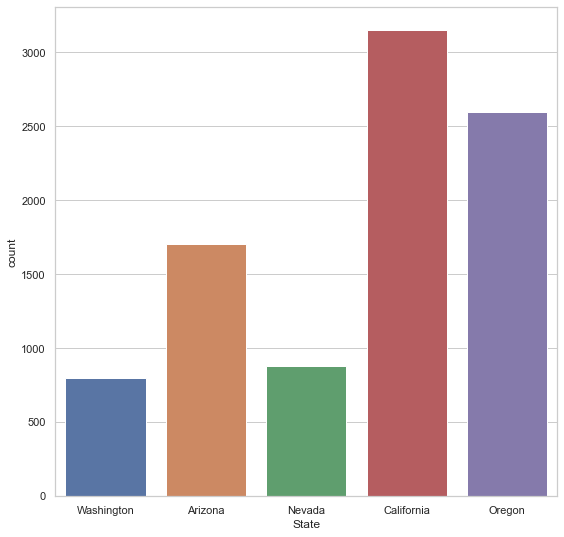

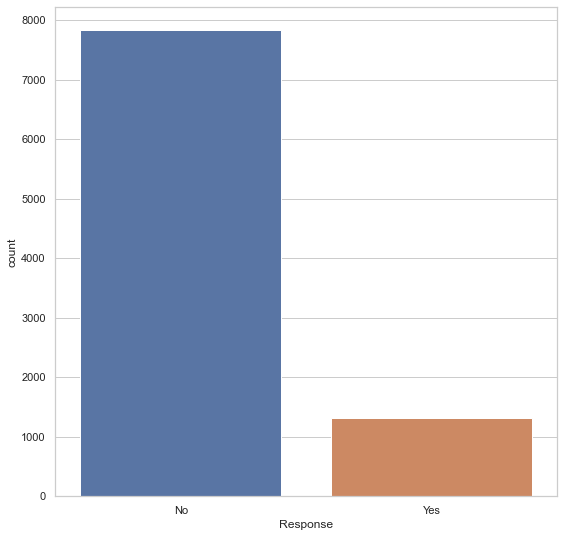

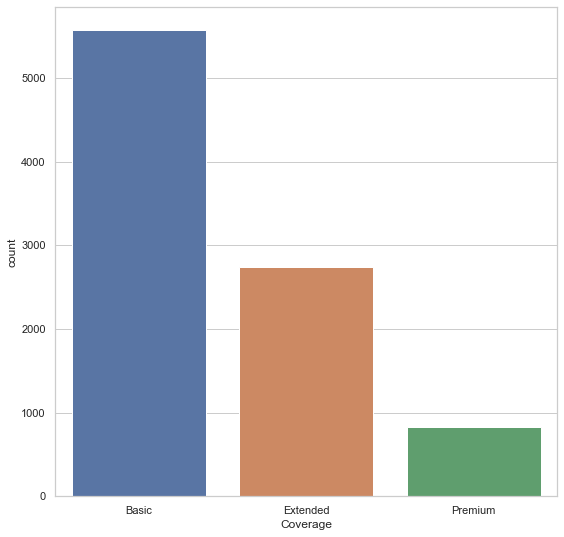

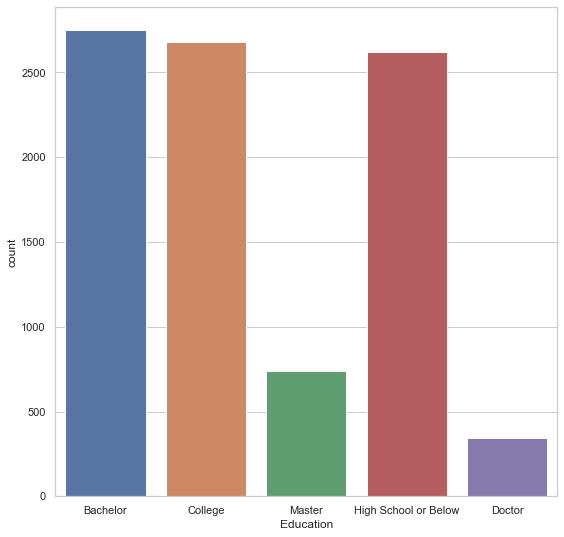

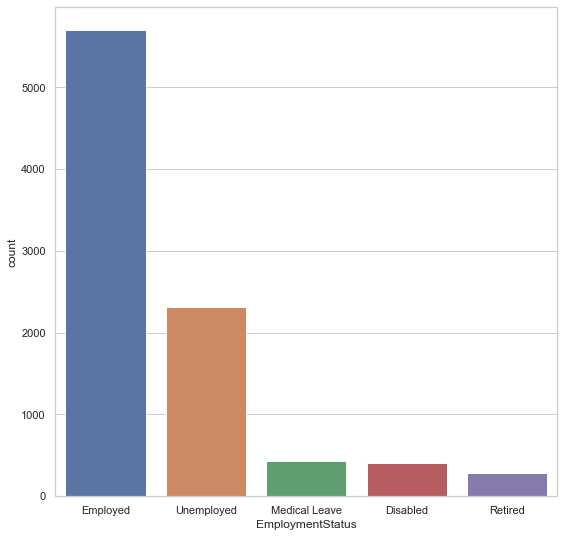

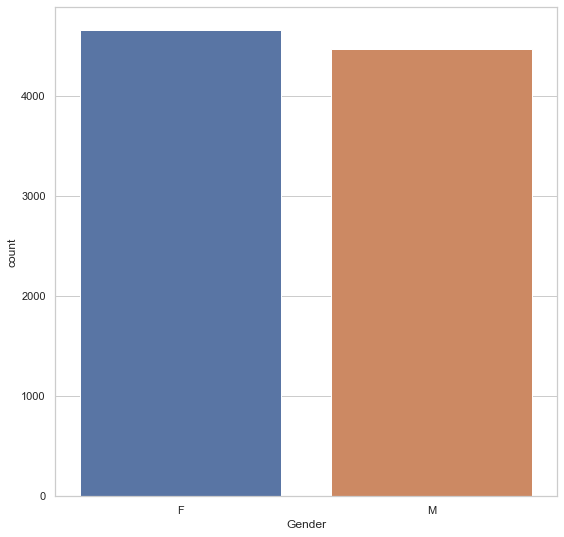

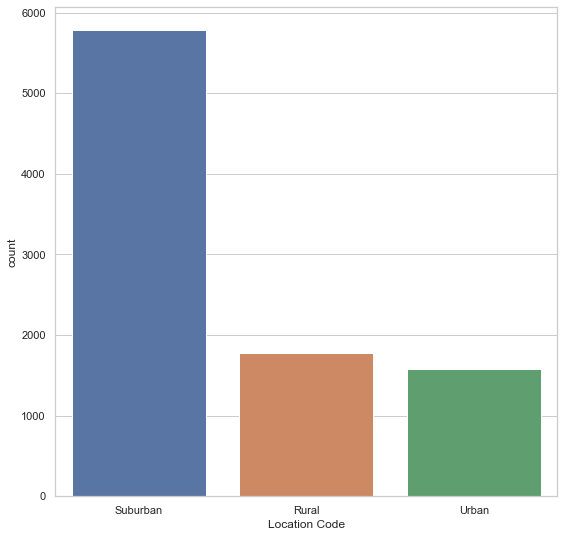

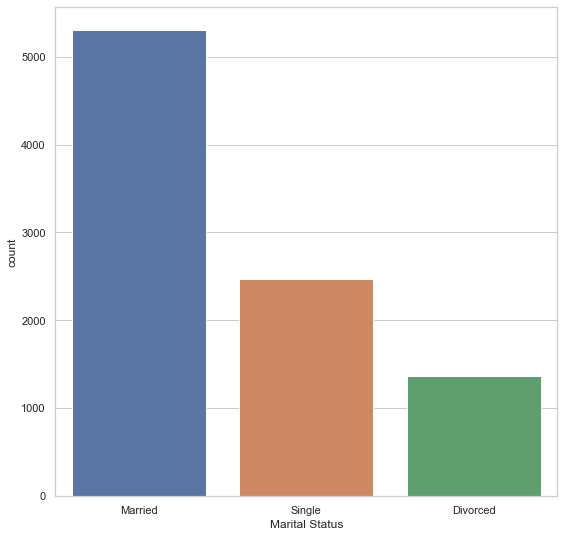

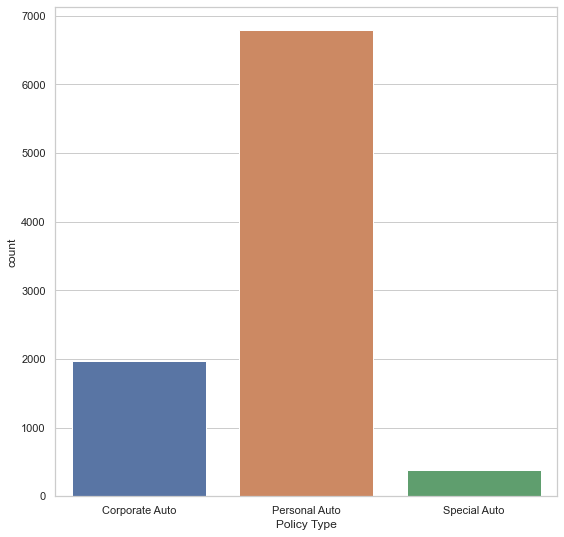

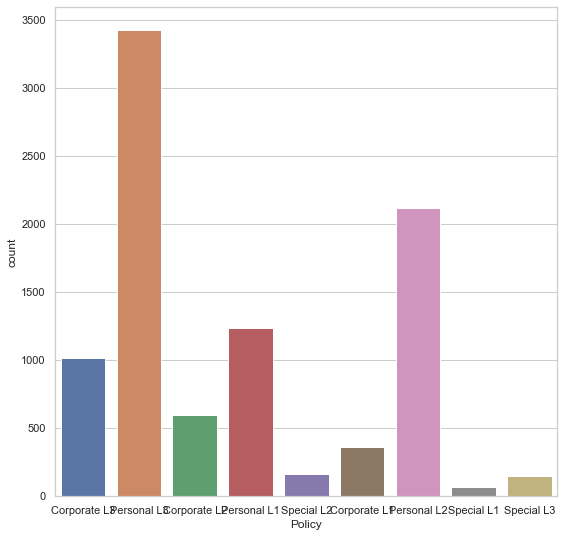

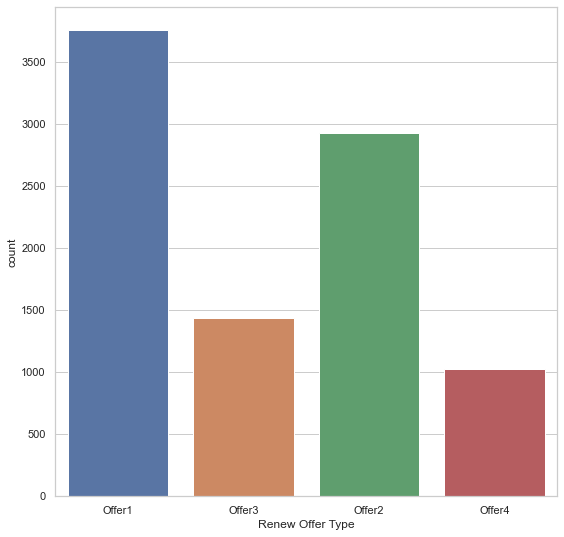

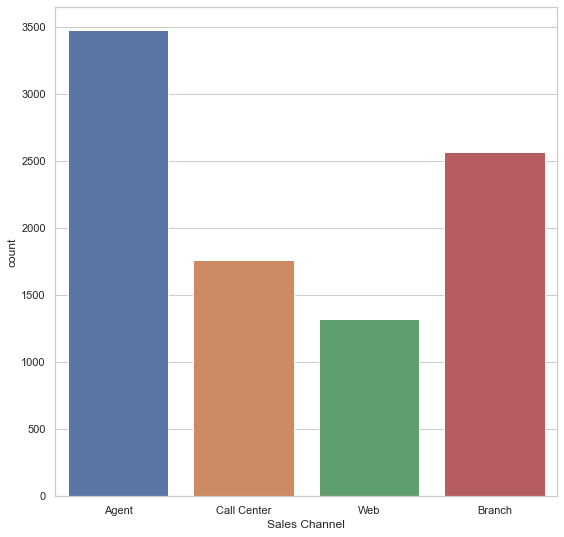

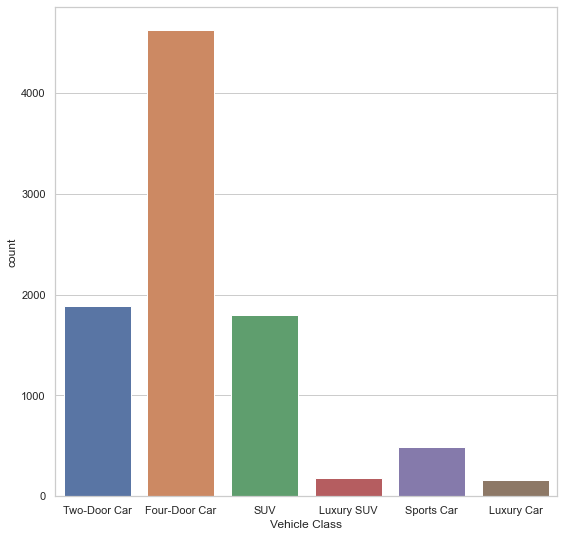

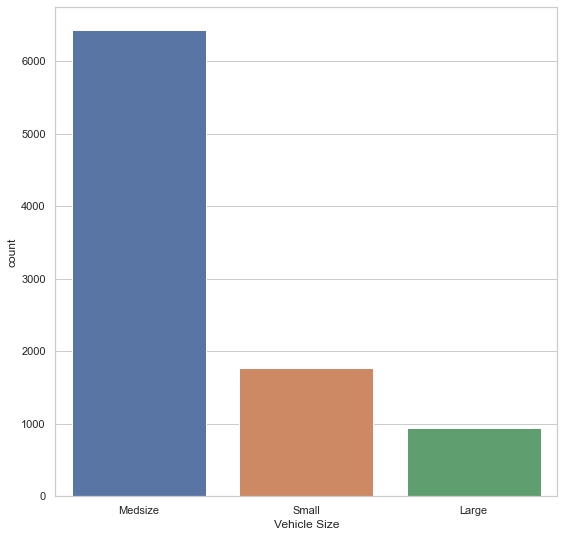

In [18]:
for c in ColumnType[ 'object']:
    print(c)
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)
    ax = sns.countplot(x=c, data=data)

In [19]:
categorical_features_names=ColumnType['object']
categorical_features_names

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [20]:
one_hot_categorical=pd.get_dummies(data[ColumnType['object']])
one_hot_categorical.head()

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [21]:
one_hot_categorical.shape


(9134, 57)

In [22]:
list_numerical_features=list(ColumnType['int64'])+list(ColumnType['float64'])
list_numerical_features

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [23]:
numerical_features=data[list_numerical_features]
numerical_features.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


In [24]:
X=pd.concat([numerical_features, one_hot_categorical], axis=1)
X.head()  

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,0,8,1131.464935,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,566.472247,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,7,529.881344,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,1,138.130879,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [25]:
def Norm(x):
    return((x-x.mean())/x.std())

In [26]:
X=X.apply(Norm)
X

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,-0.169630,-0.478696,-0.725497,-0.326912,...,-0.411895,-1.011839,-0.134787,-0.143375,-0.494698,-0.236533,1.960264,-0.339886,0.649469,-0.489206
1,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,2.400606,2.088779,-0.725497,-0.326912,...,-0.411895,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
2,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,0.455709,-0.478696,-0.725497,3.058592,...,-0.411895,-1.011839,-0.134787,-0.143375,-0.494698,-0.236533,1.960264,-0.339886,0.649469,-0.489206
3,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,0.329750,-0.478696,1.378214,-0.326912,...,-0.411895,-1.011839,-0.134787,-0.143375,2.021212,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
4,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,-1.018788,-0.478696,-0.725497,-0.326912,...,-0.411895,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.128497,-0.587634,0.288189,1.466904,-0.422226,-0.404225,-0.811890,-0.478696,1.378214,-0.326912,...,2.427538,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
9130,-0.528421,-0.413256,-0.108902,-0.719007,-0.422226,-0.822603,-0.188946,-0.478696,1.378214,-0.326912,...,-0.411895,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
9131,-1.239549,-0.238878,-0.605266,-0.396495,2.873088,-0.404225,1.227869,-0.478696,1.378214,-0.326912,...,-0.411895,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,-0.339886,0.649469,-0.489206
9132,-0.517328,0.080816,1.876553,-1.614872,-0.422226,0.014154,0.885064,-0.478696,1.378214,-0.326912,...,-0.411895,0.988191,-0.134787,-0.143375,-0.494698,-0.236533,-0.510080,2.941844,-1.539552,-0.489206


In [27]:
from sklearn.model_selection import train_test_split
print("imported train_test_split ")

imported train_test_split 


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

training data size: 7307
testing data size: 1827


# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
print('imported ')

imported 


In [31]:


accP = 0
bestk = 1
for k in range(1,100):
    KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
    KNN.fit(X_train,y_train)
    yhat=KNN.predict(X_test)
    acc = np.mean(yhat==y_test)

    if acc > accP:
        accP = acc
        bestK = k
        


print("the best K value is:",bestK,", ","the best accuracy for the validation data is:", accP)


the best K value is: 75 ,  the best accuracy for the validation data is: 0.5867542419266557


In [32]:
k = 75
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
KNN


# this is where we train the model 
KNN.fit(X_train,y_train)

# this is where we make the prediction  
yhat=KNN.predict(X_test)

yhat[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix
print('imported ')

imported 


In [34]:
target_names = ["A","B","C","D"]

In [35]:
print("confusion matrix:")
print( confusion_matrix(yhat,y_test))

confusion matrix:
[[501 199 104  46]
 [212 542 111  53]
 [  0  19  29   9]
 [  0   1   1   0]]


Confusion matrix, without normalization
[[501 199 104  46]
 [212 542 111  53]
 [  0  19  29   9]
 [  0   1   1   0]]


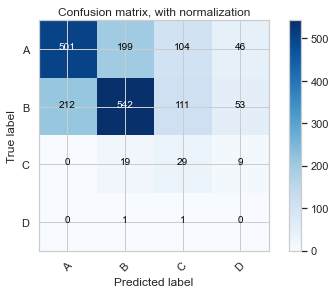

In [36]:
plot_confusion_matrix(confusion_matrix(yhat,y_test), classes=target_names,title='Confusion matrix, with normalization')


In [37]:
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)

def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.5867542419266557
precision 0.5904139433551199
recall 0.7122207621550591
F1 0.6456223942823109


# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [142]:
n_estimators=20


In [143]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

7

In [144]:
rmodel = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model.fit(X_train,y_train)
rmodel_yhat = model.predict(X_test)

In [145]:
 from sklearn import metrics
print(get_accuracy(X_train, X_test, y_train, y_test, model)) 

{'test Accuracy': 0.8883415435139573, 'train Accuracy': 1.0}


Confusion matrix, without normalization
[[691  21   2   1]
 [ 22 735  62  33]
 [  0   5 170  47]
 [  0   0  11  27]]


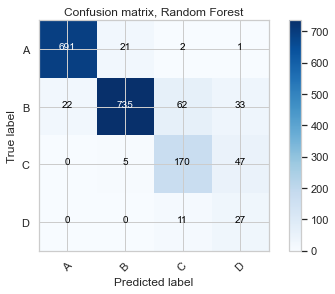

In [146]:
forest_cm = plot_confusion_matrix(confusion_matrix(rmodel_yhat,y_test), classes=target_names,title='Confusion matrix, Random Forest')

In [129]:
prf1=precision_recall_fscore_support(y_test,rmodel_yhat)
acc=accuracy_score(y_test,rmodel_yhat)
RFmetric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.8883415435139573
precision 0.8626760563380281
recall 0.9658344283837057
F1 0.9113453192808431


# Result

In [139]:
pd.DataFrame([KNNmetric, RFmetric],
             index=['KNN', 'Random Forest'])

,accuracy,precision,recall,F1
KNN,0.630542,0.676431,0.667543,0.671958
Random Forest,0.888342,0.862676,0.965834,0.911345
